In [5]:
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

import pydotplus
from IPython.display import Image

In [6]:
# Loading data

df_churn = pd.read_csv("processed_data.csv")
df_churn.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,1,0,0,1,0
1,15647311,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,0,1,1,0
2,15619304,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,1,0,0,1,0
3,15701354,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,1,0,0,1,0
4,15737888,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,0,1,1,0


In [7]:
X = df_churn.copy()
X.drop("Exited", axis=1, inplace=True)
X.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,0,0,1,0
1,15647311,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,1,1,0
2,15619304,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,0,0,1,0
3,15701354,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,1,0,0,1,0
4,15737888,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,1,1,0


In [8]:
y = df_churn["Exited"].ravel()
y[:5]

array([1, 0, 1, 0, 0])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [10]:
# Creating StandardScaler instance
# scaler = StandardScaler()

In [11]:
 # Fit the Standard Scaler with the training data
#X_scaler = scaler.fit(X_train)

In [12]:
# Scaling data
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

In [13]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [14]:
 # Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [15]:
predictions = rf_model.predict(X_test)

In [16]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [17]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1931,50
Actual 1,310,209


Accuracy Score : 0.856
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1981
           1       0.81      0.40      0.54       519

    accuracy                           0.86      2500
   macro avg       0.83      0.69      0.73      2500
weighted avg       0.85      0.86      0.84      2500



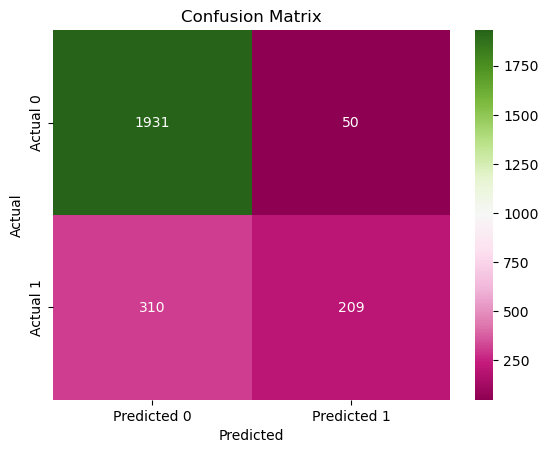

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmap using Seaborn
sns.heatmap(cm_df, annot=True, cmap="PiYG", fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [19]:
# Get the feature importance array
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.22315133619596775, 'Age'),
 (0.12628683811760066, 'NumOfProducts'),
 (0.11778949846923147, 'Balance'),
 (0.11754484755769239, 'CustomerId'),
 (0.11558620231424624, 'EstimatedSalary'),
 (0.11549080661176066, 'CreditScore'),
 (0.06983744032762867, 'Tenure'),
 (0.039137969144473844, 'IsActiveMember'),
 (0.021111073178874954, 'Geography_Germany'),
 (0.016546533813222016, 'HasCrCard')]

<Axes: title={'center': 'Feature Importances'}, ylabel='1'>

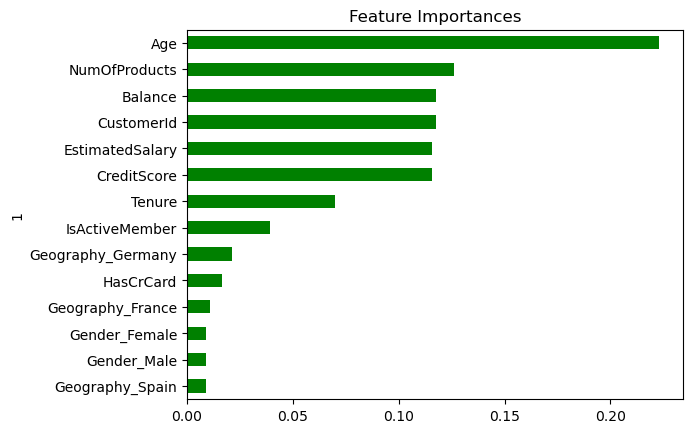

In [20]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='green', title= 'Feature Importances', legend=False)